# Regression Analysis in Statsmodels - Lab

## Introduction

In the previous code along, we looked all the requirements for running an ols simple regression using statsmodels. We worked with a toy example to understand the process and all the necessary steps that must be performed. In this lab , we shall look at a slightly more complex example to study the impact of spendings in different advertising channels of total sales.

## Objectives

You will be able to:
* Set up an analytical question to be answered by regression analysis
* Study regression assumptions for real world datasets
* Visualize the results of regression analysis

## Let's get started

In this lab, we will work with the "Advertising Dataset" which is a very popular dataset for studying simple regression. [The dataset is available at Kaggle](https://www.kaggle.com/purbar/advertising-data), but we have already downloaded for you. It is available as "Advertising.csv". We shall use this dataset to ask ourselves a simple analytical question:

## The Question

Which advertising channel has a strong relationship with sales volume, and can be used to model and predict the sales. 

### Step 1: Read the dataset and inspect its columns and 5-point statistics

In [7]:
# Load necessary libraries and import the data
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
plt.style.use('seaborn')

In [2]:
# Check the columns and first few rows
df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
# Get the 5-point statistics for data 
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [42]:
# Describe the contents of this dataset
# There are 200 items in this data with 4 columns of data. 

### Step 2: Plot histograms with kde overlay to check for the normality of the predictors

C:\Users\Thien Nguyen\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Thien Nguyen\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Thien Nguyen\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Thien Nguyen\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


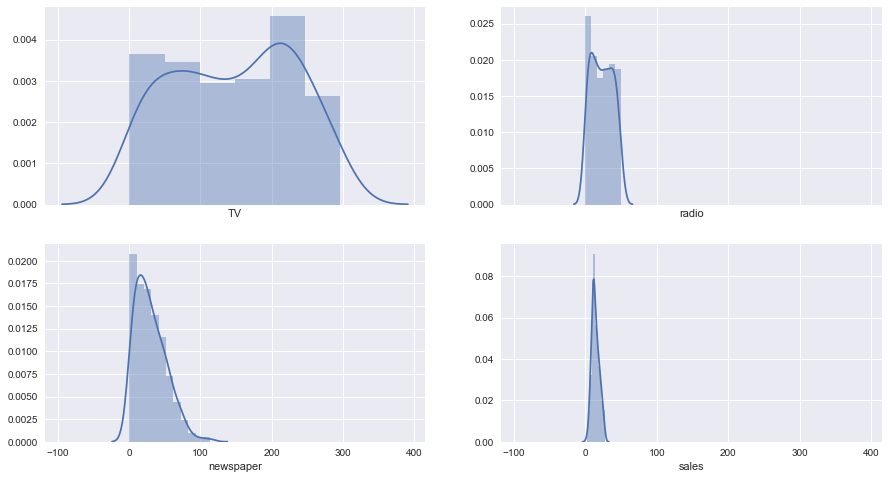

In [44]:
# For all the variables, check if they hold normality assumption
#n, bins, meh = plt.hist(df.TV, density = True)
f, axes = plt.subplots(2, 2, figsize=(15, 8), sharex=True)
sns.despine(left=True)

sns.distplot(df.TV, ax=axes[0,0])
sns.distplot(df.radio, ax=axes[0,1])
sns.distplot(df.newspaper, ax = axes[1,0])
sns.distplot(df.sales, ax=axes[1,1])

In [ ]:
# Record your observations on normality here 
# TV and radio appear normal with some possible kurtosis in radio. Newspaper and sales seems a bit positively skewed

#### Remember . Nothing is perfect . So be positive 
<img src="https://4.bp.blogspot.com/-e-CL8iluz2o/Vt3Ntg_38kI/AAAAAAAAIJo/zGJMyNaMbFY/s1600/skewed.jpg" width=400>

### Step 3: Test for the linearity assumption. 
Use scatterplots to plot each predictor against the target variable

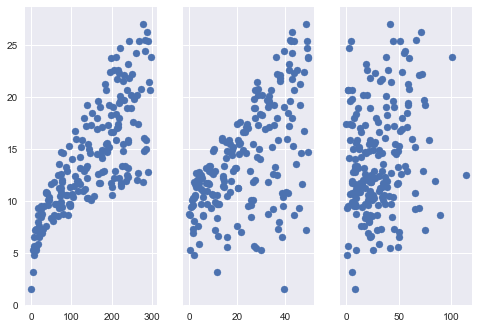

In [48]:
fig, ax = plt.subplots(1, 3, sharex='none', sharey='row')
ax[0].scatter(df.TV, df.sales)
ax[1].scatter(df.radio, df.sales)
ax[2].scatter(df.newspaper, df.sales)

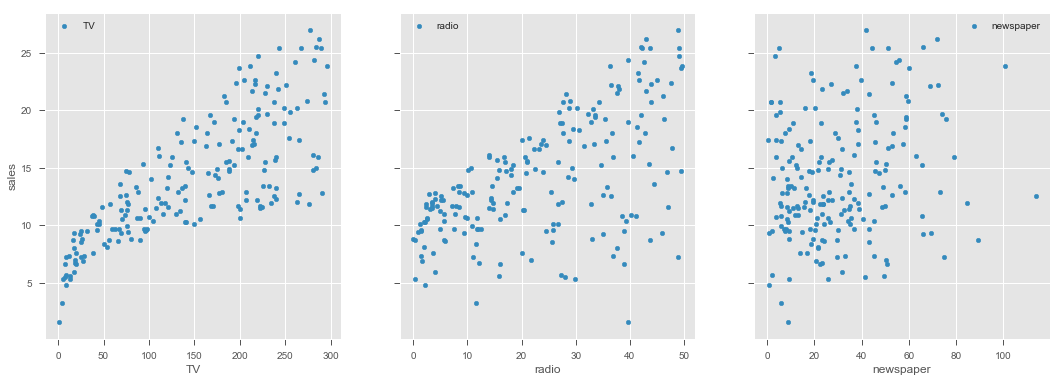

In [57]:
# visualize the relationship between the preditors and the target using scatterplots


In [ ]:
# Record yor observations on linearity here 
#TV and radio sales seems to be linear, while newspaper sales exhibit much less linearity

### Conclusion so far !

Based on above initial checks, we can confidently say that TV and radio appear to be good predictors for our regression analysis. Newspaper is very heavily skewed and also doesnt show any clear linear relationship with the target. 
> We shall move ahead with our analysis using TV and radio , and count out the newspaper due to the fact that data violates ols assumptions

Note: Kurtosis can be dealt with using techniques like log normalization to "push" the peak towards the center of distribution. We shall talk about this in the next section. 

### Step 4: Run a simple regression in `statsmodels` with TV as a predictor

In [84]:
# import libraries

# build the formula 
f = 'sales~TV'
model = ols(formula = f, data=df).fit()
# create a fitted model in one line


### Step 5: Get regression diagnostics summary


In [56]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     TV   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 04 Nov 2018   Prob (F-statistic):           1.47e-42
Time:                        10:26:10   Log-Likelihood:                -1079.2
No. Observations:                 200   AIC:                             2162.
Df Residuals:                     198   BIC:                             2169.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -33.4502     10.897     -3.070      0.002     -54.939     -11.961
sales         12.8717      0.729     17.668      0.000      11.435      14.308
==============================================================================
Omnibus:                       21.952   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.224
Skew:                           0.882   Prob(JB):                     2.02e-06
Kurtosis:                       3.193   Cond. No.                         43.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Record your observations on "Goodness of fit"

In [ ]:
#r-square is only .612, which does not suggestion a good fit. Kurtosis is also over 3, which suggest the data is leptokurtic.
#there is some positive skew as well 


Note here that the coefficients represent associations, not causations


### Step 6:  Draw a prediction line with data points on a scatter plot for X (TV) and Y (Sales)

Hint: We can use `model.predict()` functions to predict the start and end point of of regression line for the minimum and maximum values in the 'TV' variable. 

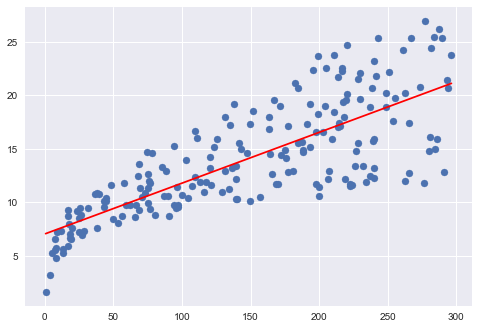

In [94]:
# create a DataFrame with the minimum and maximum values of TV
d = {'TV': [df.TV.min(), df.TV.max()]}
TV_df = pd.DataFrame(data = d)
TV_df.head()

# make predictions for those x values and store them
pred = model.predict(TV_df.TV)

# first, plot the observed data and the least squares line
plt.scatter(df.TV, df.sales)
plt.plot(TV_df,pred, color = 'red')

### Step 7: Visualize the error term for variance and heteroscedasticity

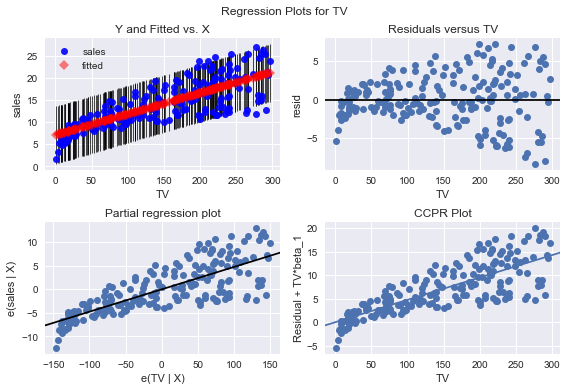

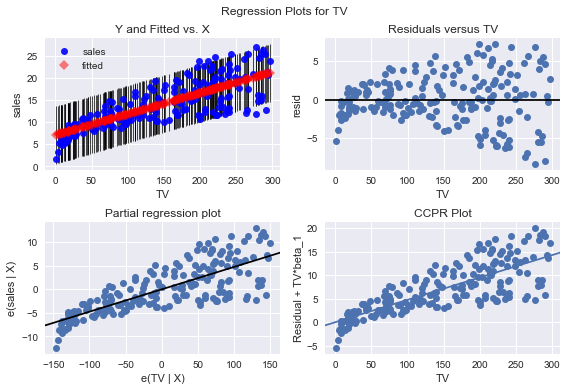

In [89]:
sm.graphics.plot_regress_exog(model, 'TV')

In [ ]:
# Record Your observations on residuals
#Residuals indicate some measure or heteroscedasticity

### Next, repeat above for radio and go through the same process, recording your observations

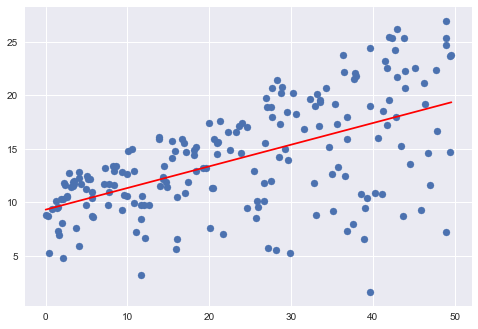

In [98]:
new_f = 'sales~radio'
model2 = ols(formula = new_f, data = df).fit()
d = {'radio': [df.radio.min(), df.radio.max()]}
radio_df = pd.DataFrame(data = d)

# make predictions for those x values and store them
pred = model2.predict(radio_df.radio)

# first, plot the observed data and the least squares line
plt.scatter(df.radio, df.sales)
plt.plot(radio_df,pred, color = 'red')

In [99]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Sun, 04 Nov 2018   Prob (F-statistic):           4.35e-19
Time:                        11:13:15   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
# Record your observations here for goodnes of fit 
# fit is rather bad with a low R-squared

## The Answer


Based on above analysis, we can conclude that none of the two chosen predictors is ideal for modeling a relationship with the sales volumes. `Newspaper` clearly violated normality and linearity assumptions. TV and radio did not provide a high value for co-efficient of determination - TV performed slightly better than the radio. There is obvious heteroscdasticity in the residuals for both variables. 

> We can either look for further data, perform extra pre-processing or use more advanced techniques. 

Remember there are lot of technqiues we can employ to FIX this data. 

Whether we should call TV the "best predictor" or label all of them "equally useless", is a domain specific question and a marketing manager would have a better opinion on how to move forward with this situation. 

In the following lesson, we shall look at the more details on interpreting the regression diagnostics and confidence in the model. 

## Summary

In this lesson, we ran a complete regression analysis with a simple dataset. We looked for the regression assumptions pre and post the analysis phase. We also created some visualizations to develop a confidence on the model and check for its goodness of fit. 